In [2]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [122]:
import json
from pprint import pprint

tmp_list = []
# with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/lr-test/part-00000') as data_file:
# with open('/Users/danielkershaw/Downloads/lr-reddit-comment-time-mean') as data_file:
with open('/Users/danielkershaw/Downloads/lr-twitter-geo-mean-2') as data_file:
    for l in data_file:
        data = json.loads(l)
        tmp_list.append(data)
df = pd.DataFrame(tmp_list)


In [123]:
df.head()

,combination,observation_level,result_mean,result_var,target
0,all,1,46.515606,35628.310888,user_target
1,all,1,163.105505,693195.001407,activation_target
2,basic,1,46.571778,35648.092012,user_target
3,basic,1,166.080085,691392.430530,activation_target
4,exposure,1,55.261312,38133.258477,user_target


In [125]:
dft = df.drop('result_mean', 1).set_index(['target','combination','observation_level']).unstack()
dft.columns = dft.columns.droplevel()

dft_error = df.drop('result_var', 1).set_index(['target','combination','observation_level']).unstack()
dft_error.columns = dft_error.columns.droplevel()

# dft.sortlevel(level=1).plot(legend=False)

In [126]:
dft.T

target            activation_target                                \
combination                     all          basic      community   
observation_level                                                   
0                     687069.355643  691617.722461  710529.611387   
1                     693195.001407  691392.430530  877236.609947   
2                     703284.062000  681021.339387  698531.401286   
3                     669660.163960  678213.691254  687996.022357   
4                     681373.435056  676350.760972  684038.914023   
5                     685155.447616  685487.011425  694763.726640   
6                     691699.788258  684753.379944  692406.878632   
7                     682015.903725  679444.577653  687540.216594   
8                     686541.950586  691332.126416  672181.072477   
9                     660193.841077  647599.188376  663024.737807   
10                    641170.624286  643160.115161  627103.281119   
11                    564056.364927  618217.484005  520667.584009   
12                    560438.012092  592001.966163  513703.761807   
13                    455893.698454  567984.759191  467061.314194   
14                    428378.733778  525593.540512  483801.664664   
15                    434125.287848  549649.433981  518070.674203   
16                    418681.997480  518455.821687  448943.672838   
17                    385347.965572  470735.578927  468682.848403   
18                    350852.622553  418572.446795  477581.324776   
19                    308043.959549  333527.332648  487715.967408   
20                    223912.928591  259246.870417  506470.788812   
21                    180452.322861  205036.551799  517043.422979   
22                    153503.724787  172961.724957  516769.858036   
23                    104038.925505  121866.813725  531697.505149   
24                     60050.198100   72939.681014  537166.979286   
25                     27784.016898   33700.944141  527661.443865   
26                     15510.445674   23100.226020  543215.308473   
27                     13319.156781   16132.090626  531319.055762   
28                     10769.763088   13461.916834  540267.151257   
29                      9082.108861   21872.198431  541896.284231   
30                     10058.459161    8311.685448  543544.750424   

target                                            user_target                \
combination             exposure           time           all         basic   
observation_level                                                             
0                  712715.890550  713011.694159  3.535218e+04  3.566985e+04   
1                  697434.178960  739587.225389  3.562831e+04  3.564809e+04   
2                  694397.024211  721209.271287  3.522841e+04  3.520100e+04   
3                  926767.919643  694244.860437  3.423794e+04  3.535076e+04   
4                  697694.070735  704262.799541  3.516159e+04  3.455116e+04   
5                  692481.214014  710956.395023  3.411224e+04  3.730283e+04   
6                  698965.804541  709627.213332  3.496179e+04  3.493527e+04   
7                  685740.195226  705038.693773  3.406920e+04  3.471032e+04   
8                  692485.146947  703616.291576  3.317701e+04  3.315622e+04   
9                  691309.928771  704149.262102  3.169422e+04  3.186643e+04   
10                 889658.009752  711698.048744  3.101121e+04  3.061980e+04   
11                 629066.879499  719649.381070  2.912789e+04  2.864372e+04   
12                 586143.377706  740109.795605  2.712944e+04  2.680356e+04   
13                 527216.620025  718654.971583  2.547592e+04  2.512311e+04   
14                 441294.109383  752611.151703  2.268211e+04  2.207932e+04   
15                 424540.714081  721239.856458  2.167086e+04  2.122128e+04   
16                 427469.846326  756625.090907  2.119312e+04  2.059165e+04   
17                 338538.508303  721382.747923  2.747994e+04  1.816500e+

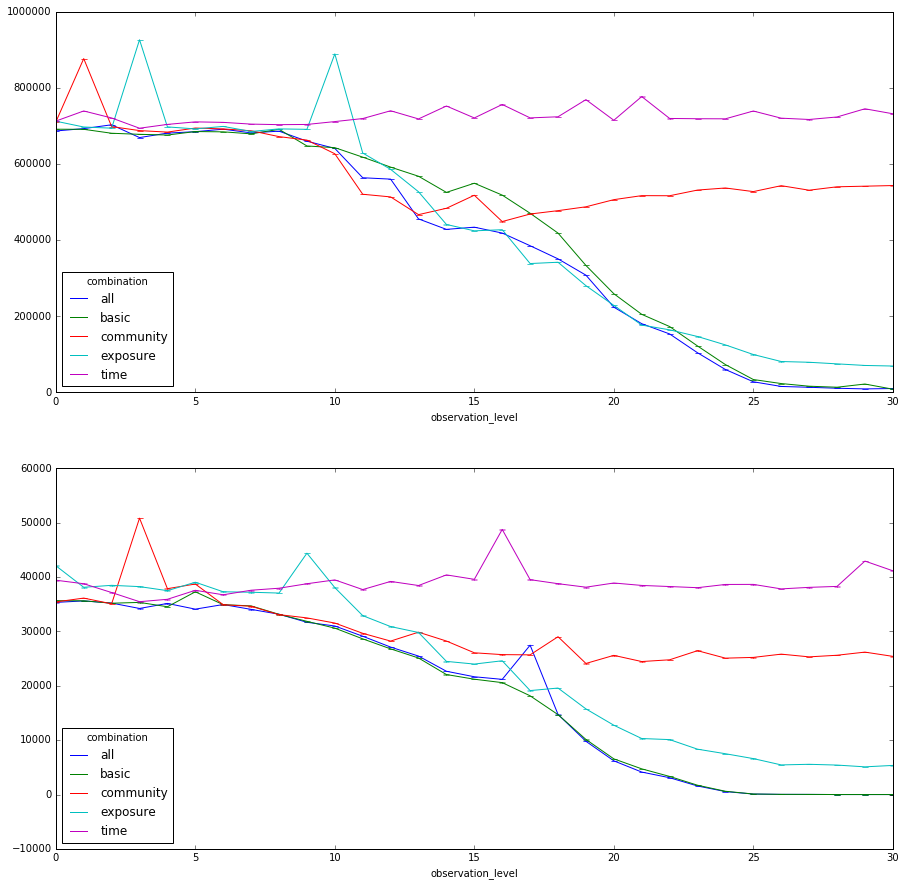

In [129]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0], yerr=dft_error.T.xs('activation_target', axis=1))
dft.T.xs('user_target', axis=1).plot(ax=a[1], yerr=dft_error.T.xs('user_target', axis=1))


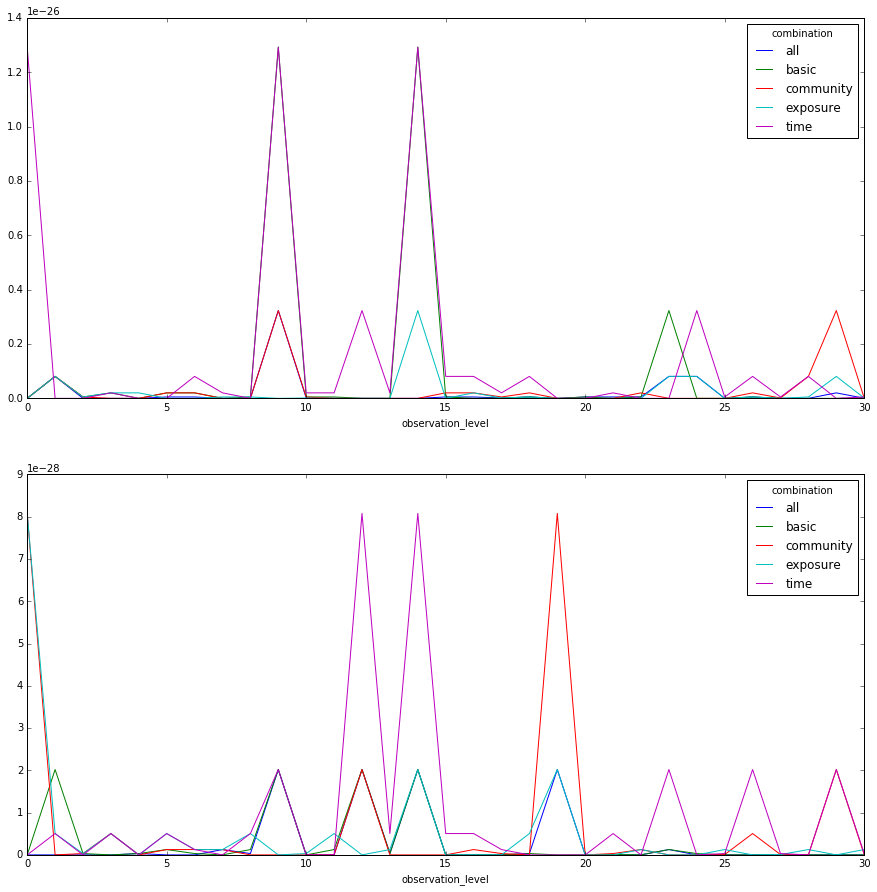

In [121]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0])
dft.T.xs('user_target', axis=1).plot(ax=a[1])

In [104]:
dft.T.xs('activation_target', axis=1)

combination,all,basic,community,exposure,time
observation_level,,,,,
0,1.323489e-23,1.323489e-23,0.000000e+00,0.000000e+00,0.000000e+00
1,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26
2,3.308722e-24,1.323489e-23,3.308722e-24,1.323489e-23,1.323489e-23
3,3.308722e-24,3.308722e-24,0.000000e+00,0.000000e+00,3.308722e-24
4,0.000000e+00,1.323489e-23,1.323489e-23,0.000000e+00,1.323489e-23
5,0.000000e+00,3.231174e-27,0.000000e+00,3.231174e-27,0.000000e+00
6,1.292470e-26,3.231174e-27,0.000000e+00,0.000000e+00,1.292470e-26
7,0.000000e+00,0.000000e+00,1.292470e-26,1.292470e-26,0.000000e+00
8,0.000000e+00,3.231174e-27,5.169879e-26,0.000000e+00,1.292470e-26
